In [2]:
import librosa
import matplotlib.pyplot as plt
# from librosa import display
import os
import json
from scipy.io import wavfile

In [3]:
existing_file_path = "./../../data/audio/morse_text_audio_files_test/clap/3_clap.wav"
# sampling_rate, samples = wavfile.read(new_file_path)#, sr=5500, mono=True, offset=0.0
#                                 #   , duration=None)
samples, sampling_rate = librosa.load(existing_file_path, sr=5500, mono=True, offset=0.0
                        , duration=None)

In [4]:
import pandas as pd

In [5]:
new_samples = ((pd.Series(samples) - min(samples)) * (1 - (-1))) / (max(samples) - min(samples)) + (-1)


In [6]:
max(new_samples)

1.0

In [7]:
# new_samples = map(lambda oldVal: ((oldVal - min(samples)) * (1 - (-1))) / (max(samples) - min(samples)) + (-1), samples)
# training_data[name.split('.')[0]] = new_samples
bin_samples = [1 if abs(new_val)>0.05 else 0 for new_val in new_samples]
# print(bin_samples)

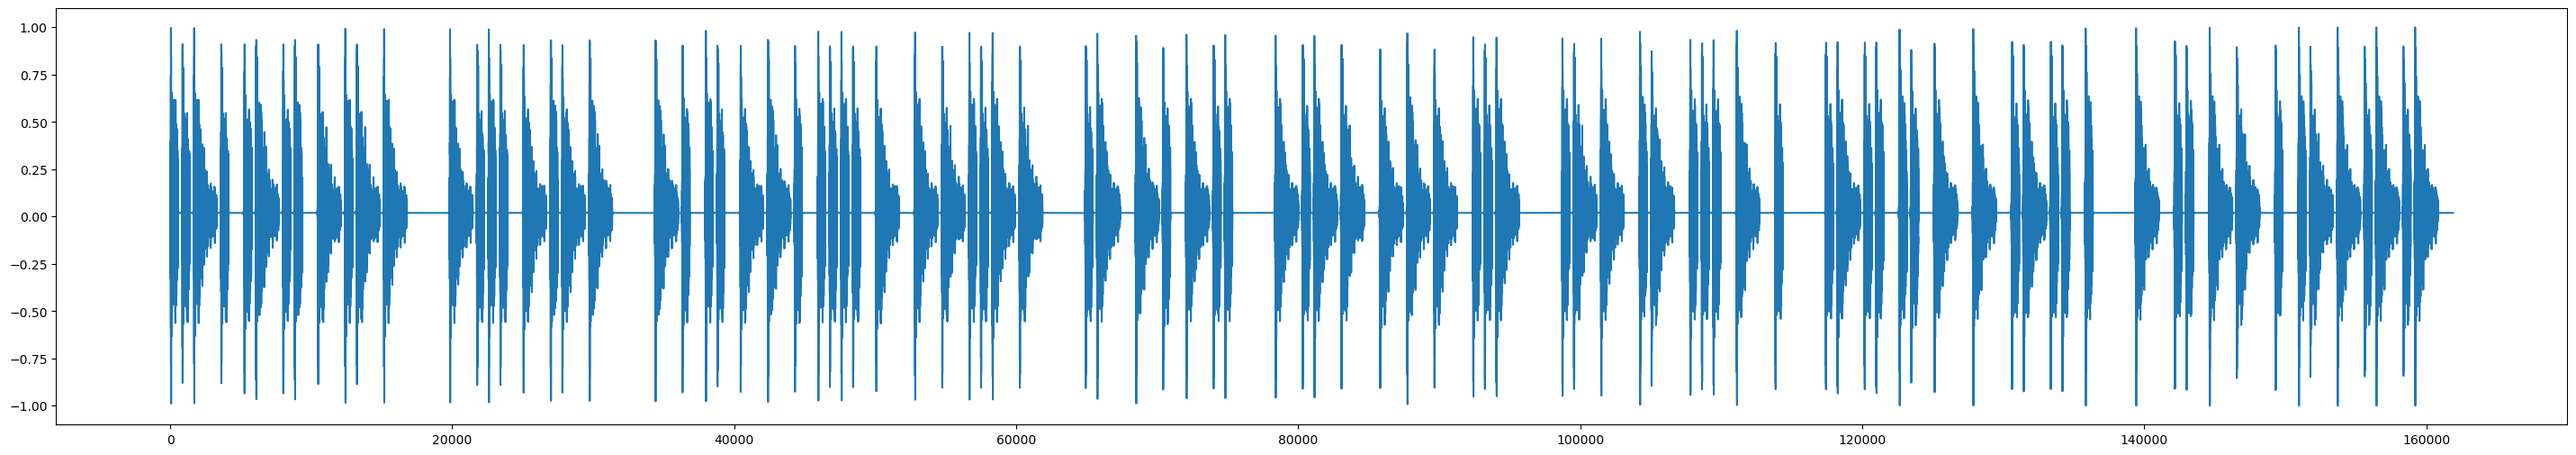

In [8]:
fig = plt.figure(figsize=(36, 6))
plt.plot(new_samples)


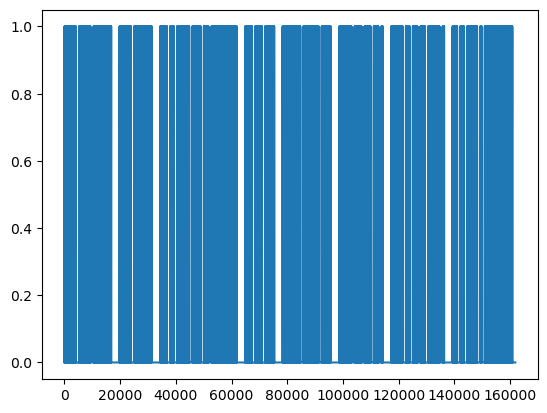

In [9]:
# fig = plt.figure(figsize=(36, 6))
plt.plot(bin_samples)


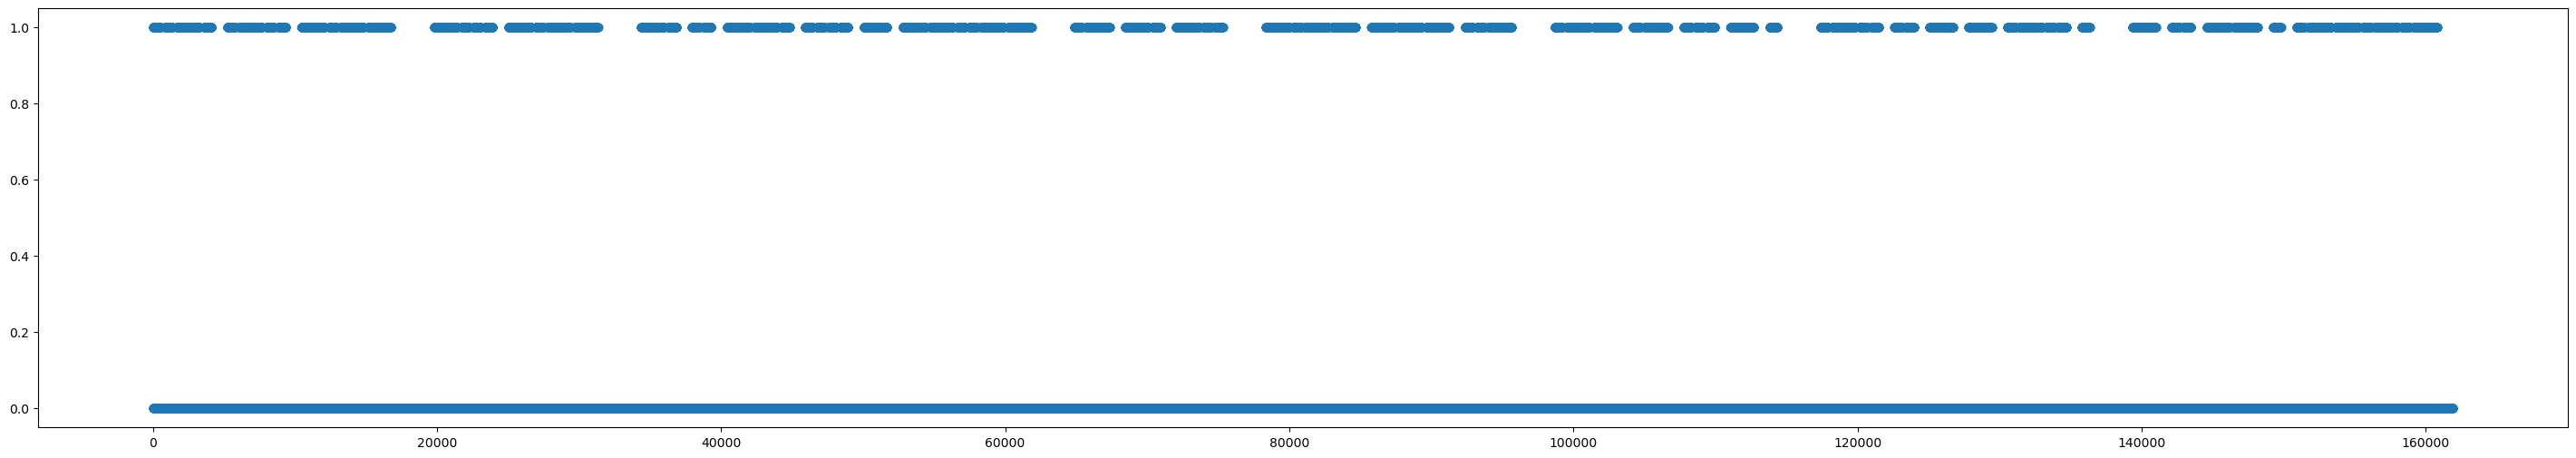

In [10]:
fig = plt.figure(figsize=(36, 6))
plt.scatter(range(len(new_samples)), bin_samples)

In [12]:
import numpy as np

In [13]:
new_bin_samples = [(1 if np.mean(bin_samples[i-50:i+50]) > 0.5 else 0) if i >50 and i < len(bin_samples)-49
      else bin_samples[i] for i in list(range(50, len(bin_samples)-49))]

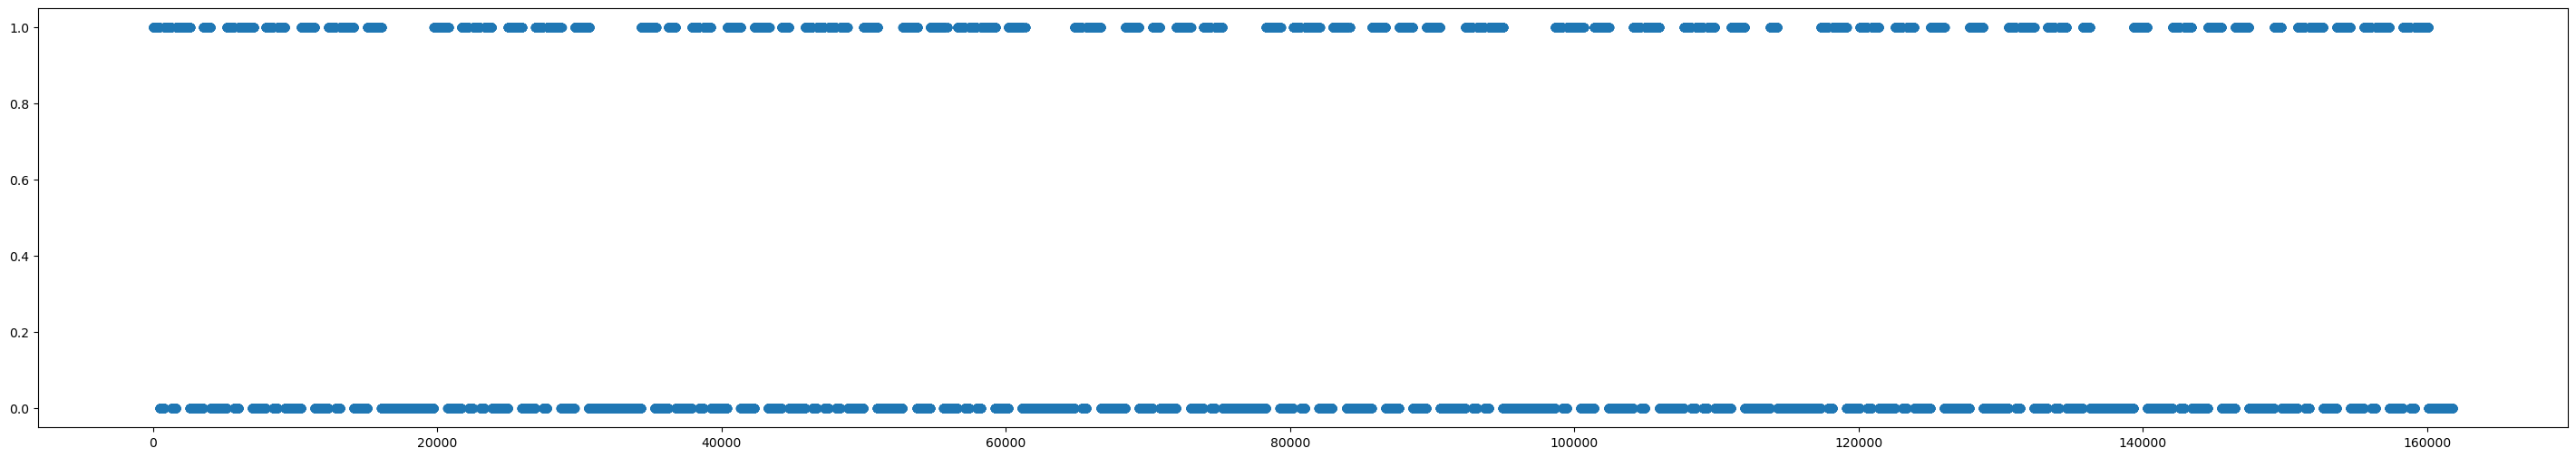

In [14]:
fig = plt.figure(figsize=(36, 6))
plt.scatter(range(len(new_bin_samples)), new_bin_samples)

In [15]:
new_list = []
k = 0
for i in range(len(new_bin_samples)-1):
    if new_bin_samples[i] != new_bin_samples[i+1]:
        if new_bin_samples[i] == 1:
            new_list.append(i-k+1)
        else:
            new_list.append(-(i+1-k))
        k = i 

In [36]:
count_sound_silence = [i for i in new_list if abs(i)>50]

In [38]:
count_sound_silence_norm = ((pd.Series(count_sound_silence) - min(count_sound_silence)) * (1 - (-1))) / (max(count_sound_silence) - min(count_sound_silence)) + (-1)


(array([ 4.,  3.,  0.,  0., 11., 32.,  8., 50., 49., 42.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

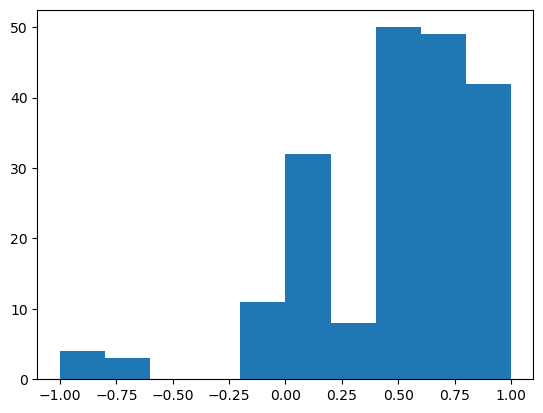

In [40]:
plt.hist(count_sound_silence_norm)

In [42]:
count_sound= [i for i in new_list if abs(i)>50 and i > 0]

In [43]:
count_sound_norm = ((pd.Series(count_sound) - min(count_sound)) * (1 - (0))) / (max(count_sound) - min(count_sound)) -0


(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

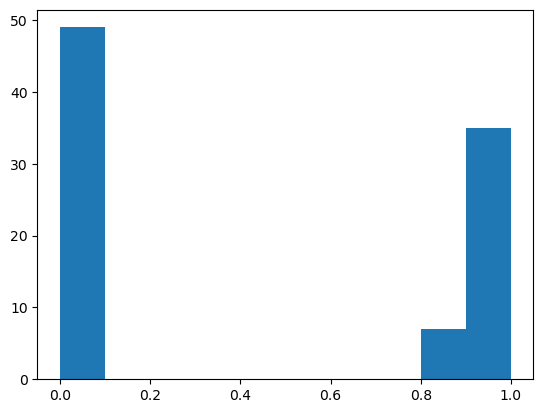

In [44]:
plt.hist(count_sound_norm)

In [ ]:
count_sound = [i for i in new_list if abs(i)>50 and i >0]

In [ ]:
count_sound_norm = ((pd.Series(count_sound) - min(count_sound)) * (1 - (0))) / (max(count_sound) - min(count_sound)) + 0


In [49]:
count_sound_norm = ((pd.Series(count_sound) - 0) * (1 - (0))) / (max(count_sound) - 0) + 0


In [50]:
count_sound_norm

0     0.480441
1     0.512538
2     0.960883
3     0.513541
4     0.511535
        ...   
86    0.978937
87    0.519559
88    0.978937
89    0.520562
90    0.978937
Length: 91, dtype: float64

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 35.]),
 array([0.48044132, 0.53239719, 0.58435306, 0.63630893, 0.68826479,
        0.74022066, 0.79217653, 0.8441324 , 0.89608826, 0.94804413,
        1.        ]),
 <BarContainer object of 10 artists>)

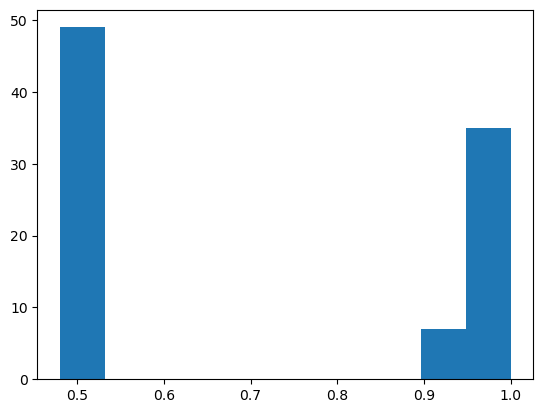

In [51]:
plt.hist(count_sound_norm)

In [47]:
dot_list = [i for i in count_sound_norm if i <0.4]

In [48]:
dot_list

[0.0,
 0.06177606177606178,
 0.0637065637065637,
 0.059845559845559844,
 0.059845559845559844,
 0.07335907335907337,
 0.059845559845559844,
 0.059845559845559844,
 0.05405405405405406,
 0.06177606177606178,
 0.07528957528957529,
 0.06563706563706563,
 0.052123552123552123,
 0.0637065637065637,
 0.06563706563706563,
 0.052123552123552123,
 0.06177606177606178,
 0.052123552123552123,
 0.06177606177606178,
 0.052123552123552123,
 0.06177606177606178,
 0.0637065637065637,
 0.0637065637065637,
 0.0637065637065637,
 0.05019305019305019,
 0.06563706563706563,
 0.05019305019305019,
 0.0637065637065637,
 0.04826254826254826,
 0.07915057915057915,
 0.04826254826254826,
 0.0694980694980695,
 0.04826254826254826,
 0.07142857142857142,
 0.0694980694980695,
 0.07335907335907337,
 0.0444015444015444,
 0.07142857142857142,
 0.06756756756756757,
 0.07722007722007722,
 0.07722007722007722,
 0.05019305019305019,
 0.06177606177606178,
 0.07335907335907337,
 0.05405405405405406,
 0.05019305019305019,
 0.05

In [ ]:
dot_list = [i for i in count_sound_norm if i <0.5]

In [67]:
count_silence = [abs(i) for i in new_list if abs(i)>50 and i < 0 ]

In [68]:
count_silence_norm = ((pd.Series(count_silence) - min(count_silence)) * (1 - (0))) / (max(count_silence) - min(count_silence)) + 0


In [69]:
count_sound_norm = ((abs(pd.Series(count_sound)) - min(count_silence)) * (1 - (0))) / (max(count_silence) - min(count_silence)) + 0


(array([18., 32.,  0.,  2., 12., 12., 14.,  0.,  1., 10.]),
 array([0.        , 0.04759417, 0.09518834, 0.14278251, 0.19037668,
        0.23797086, 0.28556503, 0.3331592 , 0.38075337, 0.42834754,
        0.47594171]),
 <BarContainer object of 10 artists>)

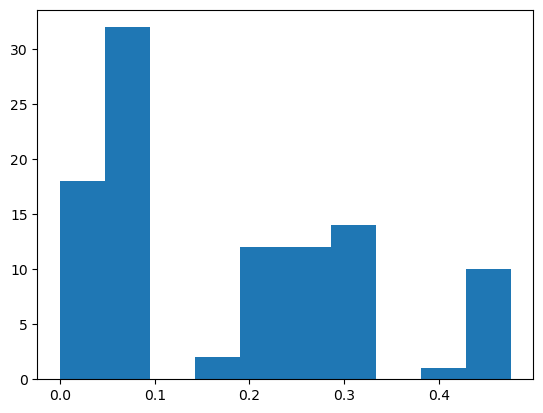

In [70]:
plt.hist([i for i in count_silence_norm if i < 0.6])

In [78]:
np.mean([i for i in count_silence_norm if i > 0.5])*3/7

0.3904765645603856

In [79]:
np.mean([i for i in count_silence_norm if i > 0.5])*1/7

0.13015885485346188

In [73]:
np.mean([i for i in count_silence_norm if i < 0.35])

0.14135887330828217

In [ ]:
plt.hist([i for i in count_silence_norm if i < 0.7])

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 35.]),
 array([0.11740445, 0.13164696, 0.14588947, 0.16013198, 0.17437448,
        0.18861699, 0.2028595 , 0.21710201, 0.23134451, 0.24558702,
        0.25982953]),
 <BarContainer object of 10 artists>)

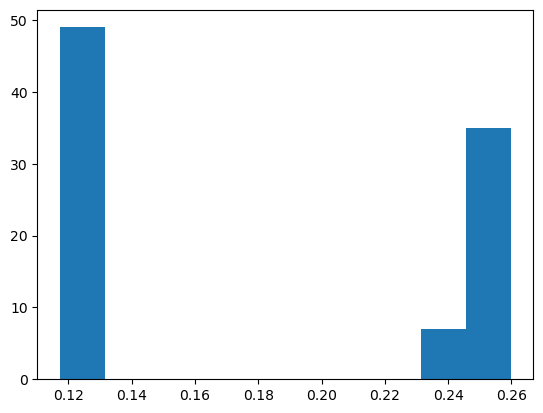

In [71]:
plt.hist(count_sound_norm)

In [74]:
np.mean([i for i in count_sound_norm if i < 0.2])

0.12607385544264446

In [75]:
np.mean([i for i in count_sound_norm if i > 0.2])

0.2514500438613719

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 35.]),
 array([479. , 530.8, 582.6, 634.4, 686.2, 738. , 789.8, 841.6, 893.4,
        945.2, 997. ]),
 <BarContainer object of 10 artists>)

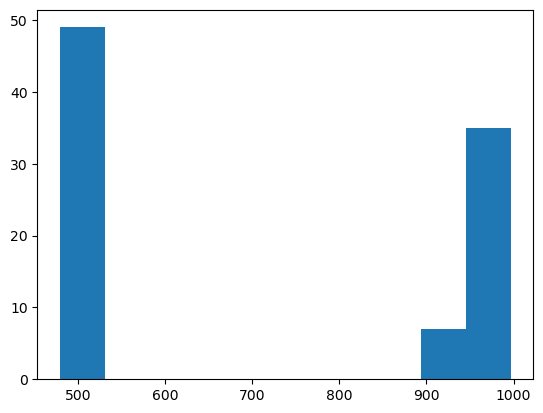

In [202]:
plt.hist([i for i in new_list if abs(i)>50 and i >0])

In [166]:
smaller_bin = []
for i in range(len(new_bin_samples)//10):
    smaller_bin.append((1 if np.mean(new_bin_samples[i-5:i+5]) > 0.5 else 0))

In [167]:
len(smaller_bin)

1584

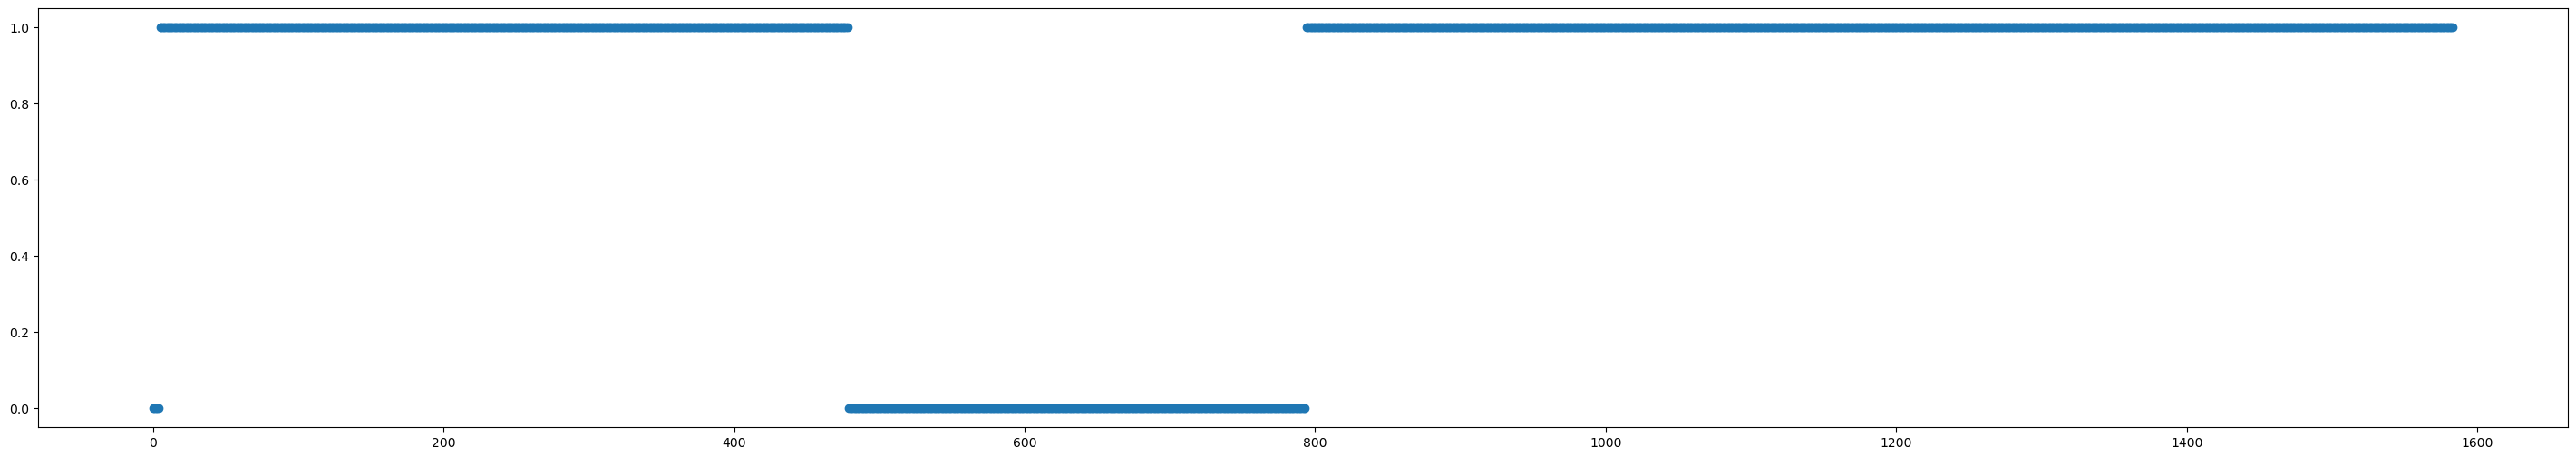

In [168]:
fig = plt.figure(figsize=(36, 6))
plt.scatter(range(len(smaller_bin)), smaller_bin)

In [155]:
len(bin_samples)

15940

(array([[7.12625071e-02, 7.11776749e-02, 7.11049061e-02, ...,
         7.12194895e-02, 7.12194857e-02, 7.12194850e-02],
        [3.61275394e-02, 3.66737597e-02, 3.64247592e-02, ...,
         3.60283826e-02, 3.60283788e-02, 3.60283790e-02],
        [4.67606786e-06, 3.13137615e-05, 2.74460195e-05, ...,
         2.48483242e-07, 2.48481905e-07, 2.48482684e-07],
        ...,
        [6.39520469e-07, 4.07763884e-07, 1.00361802e-06, ...,
         3.15298908e-17, 2.99317692e-17, 3.04362462e-17],
        [9.59100864e-09, 1.33645588e-08, 3.21325544e-08, ...,
         4.38821144e-17, 1.19933069e-17, 7.60333230e-18],
        [9.92164122e-10, 1.26158811e-09, 6.18133930e-12, ...,
         8.76836179e-19, 8.73335546e-20, 0.00000000e+00]]),
 array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
        0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
        0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
        0.140625 , 0.1484375, 0.15625  , 0.

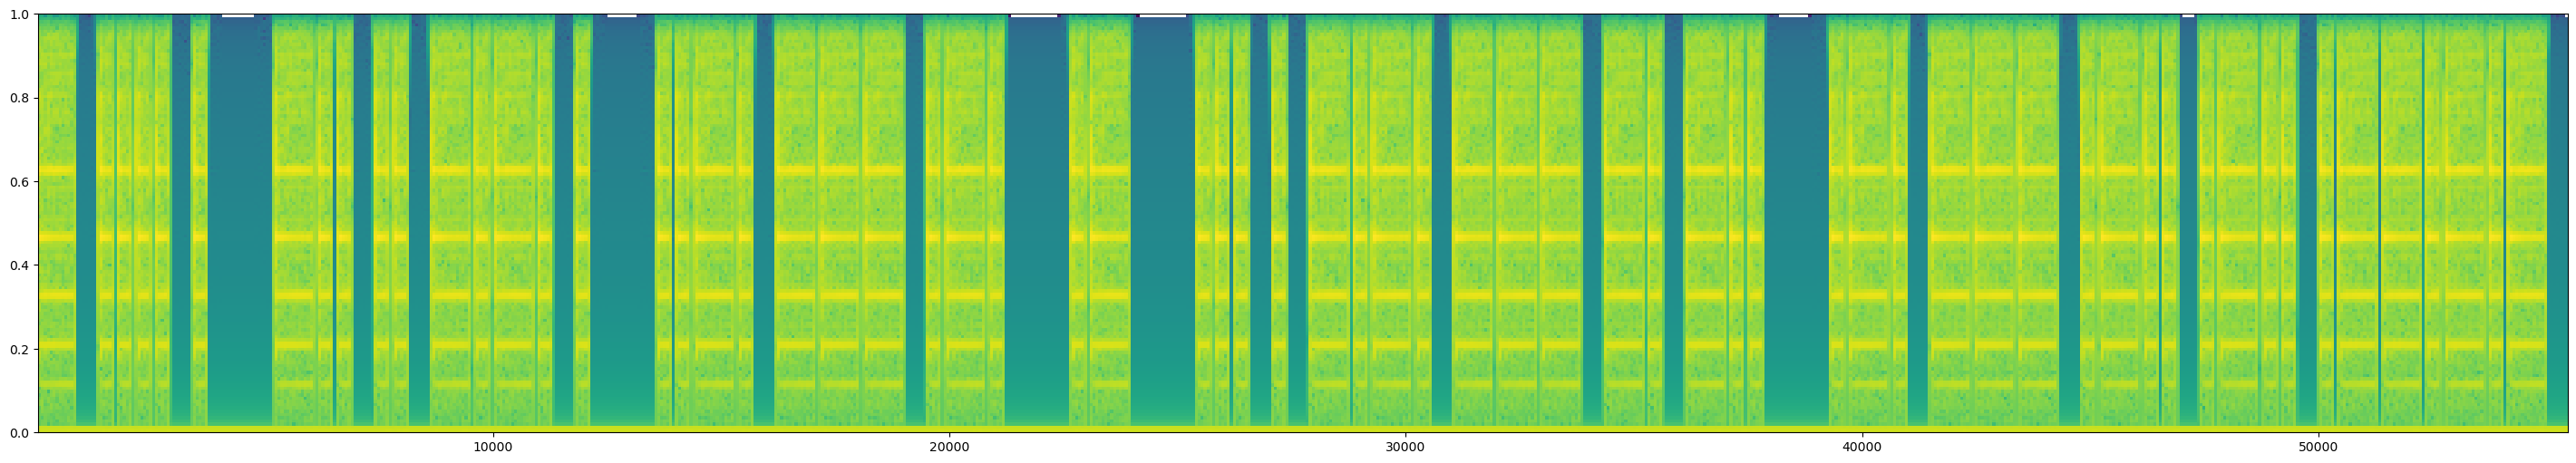

In [51]:
fig = plt.figure(figsize=(36, 6))
plt.specgram(new_samples)